# Unemployment in India

### Data Describtion:

The dataset contains unemployement rate of all states of India.
Unemployment is measured by the unemployment rate which is the number of
people who are unemployed as a percentage of the total labour force.

• We have seen a sharp increase in the unemployment rate during Covid-19.
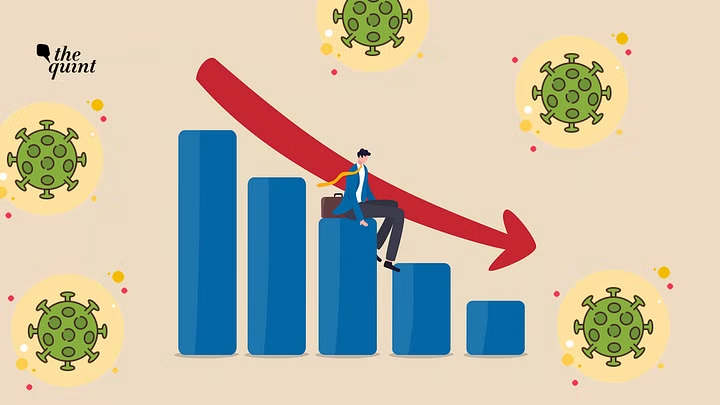


### Problem Statement:

Impact of Covid-19 on the employment rate in India.

In [245]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

from subprocess import check_output


#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [246]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

In [247]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML


In [248]:
import datetime as dt

import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

### Step 1: Reading and Understanding the Data¶

In [249]:
# Step 2: Loading the Dataset and displaying the first 10 rows of the dataset
df = pd.read_csv('Unemployment in India.csv')
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [250]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [251]:
df.shape

(768, 7)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [253]:
#Check for misiing values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [254]:
#Descriptive statistics of dataset
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [255]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [256]:
df['Area'].unique()

array(['Rural', nan, 'Urban'], dtype=object)

### Attributes Information:

Region : This column shows the states of India. This are 29 in all 'Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa','Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir','Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh','Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab','Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura','Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'.

Date : This column shows the Date on which unemployement rate is observed.

Frequency : This column shows the measuring frequency.

Estimated Unemployment Rate (%) : This column shows percentage of people unemployed in each State of India.

Estimated Employed : Number of people employed ,

Estimated Labour Participation Rate (%) : This column shows the labour participation rate is the portion of the working population in the 16-64 years age group in the economy currently seeking employment.

Area : This column shows area under which the state belong this values can be Rural, nan, Urban.

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [258]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

### Data Cleaning:

In [259]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,28
1,Date,28
2,Frequency,28
3,Estimated Unemployment Rate (%),28
4,Estimated Employed,28
5,Estimated Labour Participation Rate (%),28
6,Area,28


Observation: Here, we can see that allthe 28 records are null for each respective feature/attribute. So, it is better to drop these records.

In [260]:
df.dropna(how='all',inplace= True)

In [261]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,Region,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate (%),0
4,Estimated Employed,0
5,Estimated Labour Participation Rate (%),0
6,Area,0


Observation: All NaN, NaT values removed from dataset.

In [262]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [263]:
df.columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed Rate',
              'Estimated Labour Participation Rate', 'Area']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [264]:
df['Frequency'] = df['Frequency'].astype('category')
df['Month'] = df['Date'].dt.month

df['Month_int'] = df['Month'].apply(lambda x: int(x))

df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df['Region'] = df['Region'].astype('category')
df.drop(columns='Month', inplace=True)

In [265]:
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [266]:
df['Month_name'].head(3)

0    May
1    Jun
2    Jul
Name: Month_name, dtype: object

In [267]:
import plotly.io as pio
import plotly.express as px

In [268]:
df

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed Rate,Estimated Labour Participation Rate,Area,Month_int,Month_name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep
...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,Feb
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,Mar
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,Apr
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,May


In [269]:
# 'Date' , 'Frequency' , 'Region' are object type need to typecast
#df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [270]:
df['Frequency'] = df['Frequency'].astype('category')

In [271]:
df

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed Rate,Estimated Labour Participation Rate,Area,Month_int,Month_name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep
...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,Feb
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,3,Mar
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,Apr
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,May


In [272]:
urban_count = df[df['Area'] == 'Urban']['Region'].count()
rural_count = df[df['Area'] == 'Rural']['Region'].count()

labels = ['Urban', 'Rural']
values = [urban_count, rural_count]
df_pie = pd.DataFrame({'labels': labels, 'values': values})

fig = px.pie(df_pie, names='labels', values='values', title='Distribution of Urban and Rural Regions')

fig.update_layout(width=700, height=500)
fig.show()

In [273]:
# Animated bar plot of Unemployment rate across region from Jan.2020 to Oct.2020
plt.figure(figsize=(15,10))
fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='Region+++G',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed Rate', 'Estimated Labour Participation Rate', 'Area', 'Month_int', 'Month_name'] but received: Region+++G

<Figure size 1080x720 with 0 Axes>

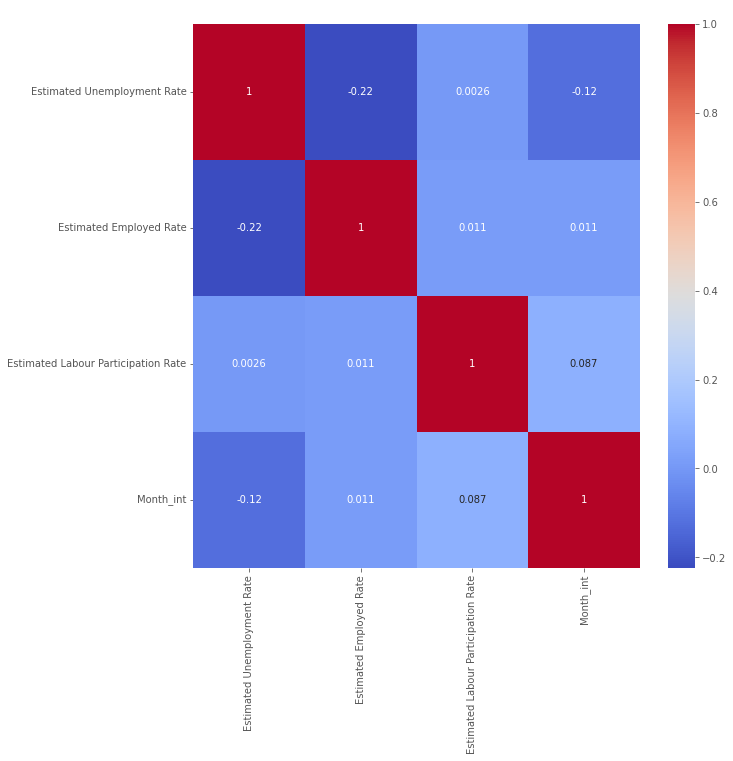

In [274]:
#Set Plotting style
numeric_data = df.select_dtypes(include='number')

plt.style.use("ggplot")
plt.figure(figsize=(10,10))
sns.heatmap(numeric_data.corr(),annot=True,cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [275]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed Rate', 'Estimated Labour Participation Rate',
       'Area', 'Month_int', 'Month_name'],
      dtype='object')

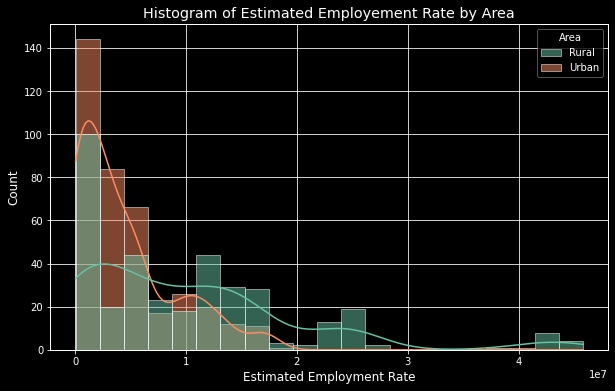

In [276]:
#Histogram of Estimated Employment Rate by Area

plt.style.use("dark_background")

df.columns = ["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed Rate","Estimated Labour Participation Rate","Area","Month_int", "Month_name"]

plt.figure(figsize=(10,6))
sns.histplot(x="Estimated Employed Rate",hue ="Area", data = df, kde= True, palette="Set2")
plt.title("Histogram of Estimated Employement Rate by Area")
plt.xlabel("Estimated Employment Rate")
plt.ylabel("Count")
plt.show()
          

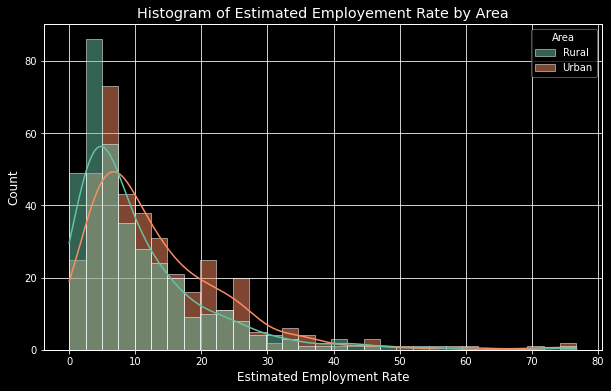

In [277]:
#Histogram of Estimated UnEmployement Rate by Area 

plt.style.use("dark_background")

df.columns = ["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed Rate","Estimated Labour Participation Rate","Area","Month_int", "Month_name"]

plt.figure(figsize=(10,6))
sns.histplot(x="Estimated Unemployment Rate",hue ="Area", data = df, kde= True, palette="Set2")
plt.title("Histogram of Estimated Employement Rate by Area")
plt.xlabel("Estimated Employment Rate")
plt.ylabel("Count")
plt.show()

In [278]:
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed Rate,Estimated Labour Participation Rate,Area,Month_int,Month_name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul


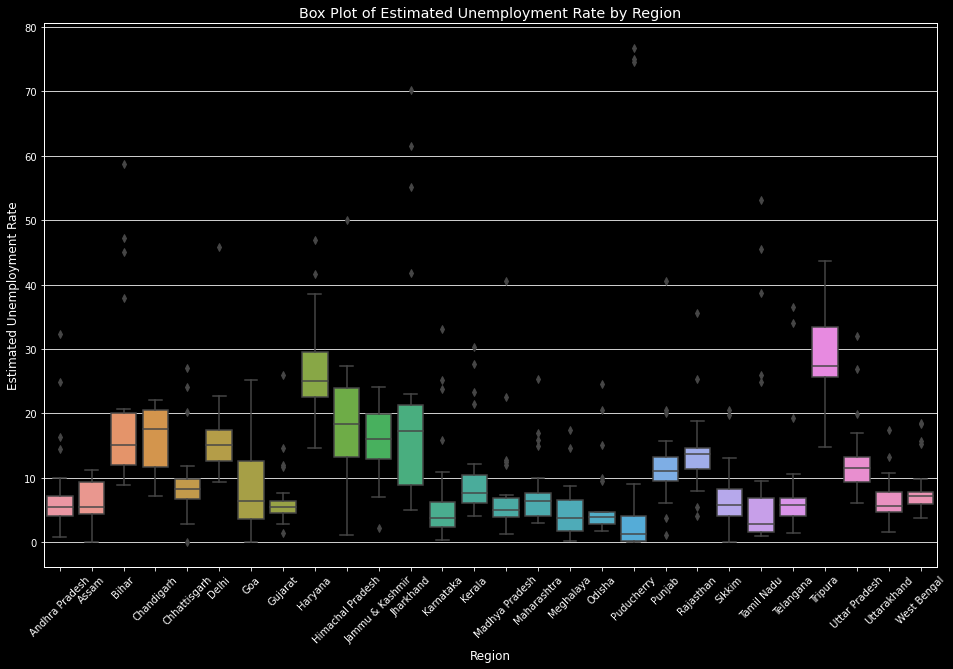

In [279]:
#BoxPlot of Estimated UnEmployement rate by Region
import seaborn as sns
data = df[['States','Estimated Unemployment Rate']]
plt.figure(figsize=(16,10))
sns.boxplot(x='States', y ='Estimated Unemployment Rate', data=data )
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xticks(rotation = 45)
plt.show()

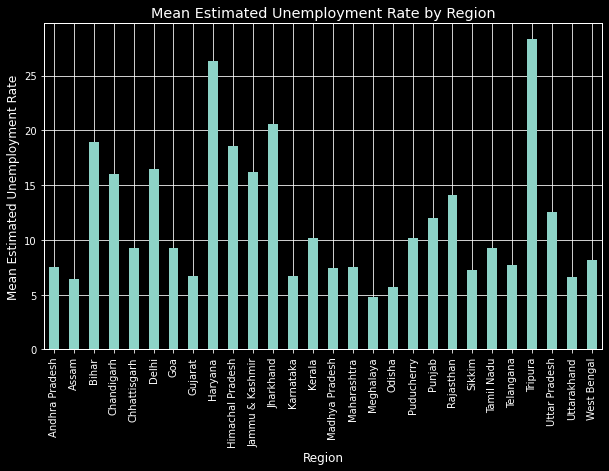

In [280]:
#Mean Estimated UnEmployement Rate by Region
data = df[['States','Estimated Unemployment Rate']]
data_grouped = data.groupby('States')['Estimated Unemployment Rate'].mean()
plt.figure(figsize=(10,6))
data_grouped.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Unemployment Rate')
plt.title('Mean Estimated Unemployment Rate by Region')
plt.show()

In [281]:
#Bar plot of average Unemployement Rate by State
import plotly.io as pio
import plotly.express as px
plot_ump = df[['Estimated Unemployment Rate','States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='States', y='Estimated Unemployment Rate',color = 'States',title = 'Average Unemployement Rate in each state',template='plotly')
fig.show()

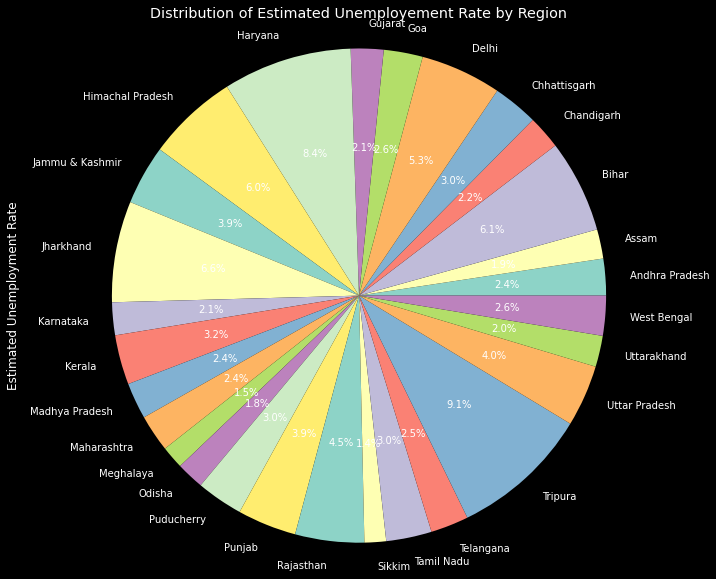

In [282]:
# Distribution of Estimated UnEmployement Rate by Resion

data = df[['States','Estimated Unemployment Rate']]
data_grouped = data.groupby('States')['Estimated Unemployment Rate'].sum()
plt.figure(figsize=(12,10))
data_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Estimated Unemployement Rate by Region')
plt.axis('equal')  #Equal aspect ratio ensures that pie is drawn as circle.
plt.show()

In [283]:
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed Rate,Estimated Labour Participation Rate,Area,Month_int,Month_name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul


In [284]:
#Animated bar plot of Unemployment rate across region from Jan.2020 to oct.2020
plt.figure(figsize=(12,10))
fig = px.bar(df, x= 'States', y='Estimated Unemployment Rate',animation_frame='Month_name', color='States', title = 'Unemployement rate across region from Jan.2020 to Oct.2020',height=700,template = 'plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

<Figure size 864x720 with 0 Axes>

<Figure size 1080x936 with 0 Axes>

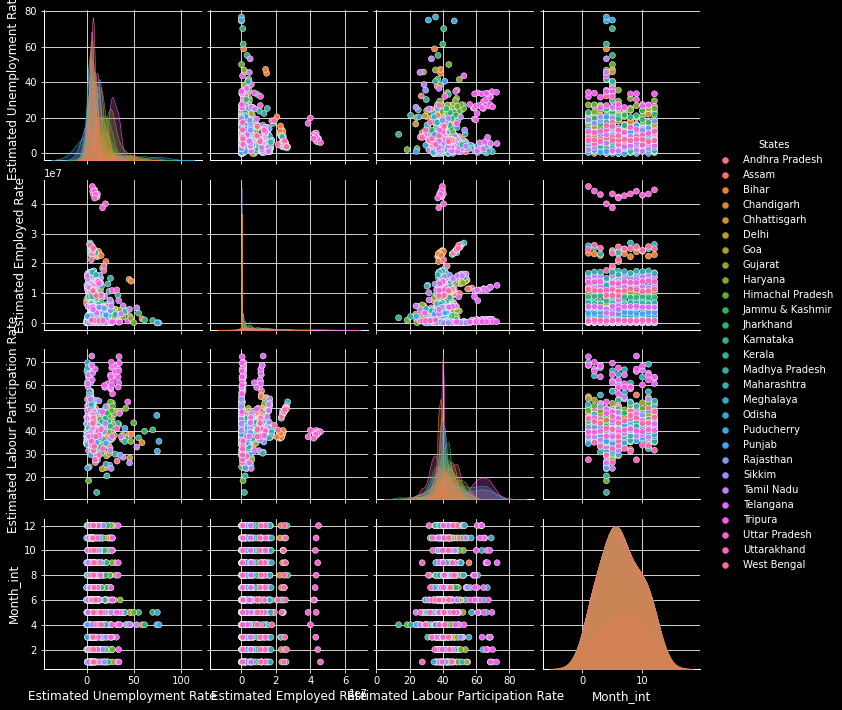

In [285]:
plt.figure(figsize=(15,13))
sns.pairplot(df,hue='States')

<Figure size 1080x936 with 0 Axes>

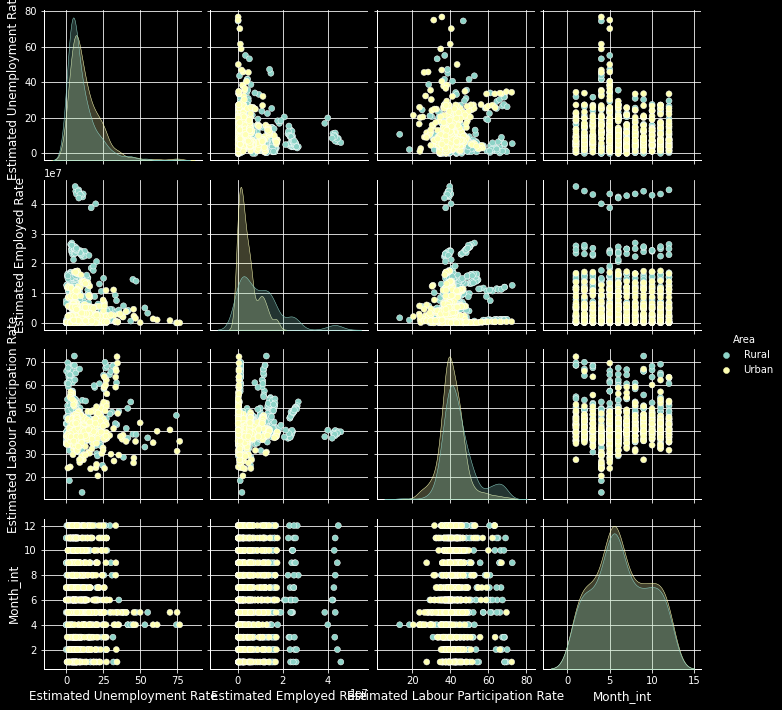

In [286]:
plt.figure(figsize=(15,13))
sns.pairplot(data=df,hue="Area")

In [287]:
df['States'].unique()

['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', ..., 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh']
Length: 28
Categories (28, object): ['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', ..., 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

In [288]:
df['States'].value_counts().reset_index()

,index,States
0,Andhra Pradesh,28
1,Karnataka,28
2,Uttar Pradesh,28
3,Tripura,28
4,Telangana,28
5,Tamil Nadu,28
6,Rajasthan,28
7,Punjab,28
8,Odisha,28
9,Maharashtra,28


In [289]:
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed Rate', 'Estimated Labour Participation Rate',
       'Area', 'Month_int', 'Month_name'],
      dtype='object')

In [290]:
df['Area'].value_counts().reset_index()

,index,Area
0,Urban,381
1,Rural,359


In [291]:
df.isna().sum().reset_index().rename(columns={0:'count'})

,index,count
0,States,0
1,Date,0
2,Frequency,0
3,Estimated Unemployment Rate,0
4,Estimated Employed Rate,0
5,Estimated Labour Participation Rate,0
6,Area,0
7,Month_int,0
8,Month_name,0


In [292]:
fig = px.scatter_geo(df,'Area','States', color="States",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()